### (A) Finding best possible combination of metaparameters
Calculating quality function for single combination of graph vectors (one atlas, one model, one threshold). Information is stored in dictionary q having separate 2D arrays for each model. Each row of this array corresponds to certain atlas, and columns correspond to thresholds. 

In [1]:
from identipy import beta_lin_comb
from identipy import quality_function
import numpy as np

path = 'data/graph/'
meta_atl = ['pow','har','dos','aal','mul'] 
meta_mod = ['cor','cov','par','pre']
meta_thr = [0.05, 0.075, 0.1, 0.125, 1.5]

q = {}
for mod in meta_mod:
    #--- store results in array for each model separately
    q[mod] = np.zeros([len(meta_atl), len(meta_thr)])
    for tup in [(atl, thr) for atl in range(len(meta_atl)) for thr in range(len(meta_thr))]:
        #print(' Model: {}, Atlas: {}, Threshold: {}'.format(mod, meta_atl[tup[0]], str(tup[1])))
        beta = [ int(x == tup[0]) for x in range(5)] + \
               [ int(mod in model) for model in meta_mod ] + \
               [ int(x == tup[1]) for x in range(5)]
        q[mod][tup[0]][tup[1]] = quality_function(beta_lin_comb(path, beta)[0], beta_lin_comb(path, beta)[2], \
                                                      similarity='euclid')

#### (A1) Plotting results

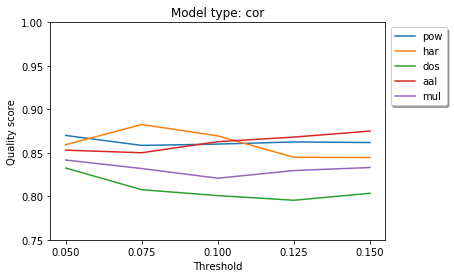

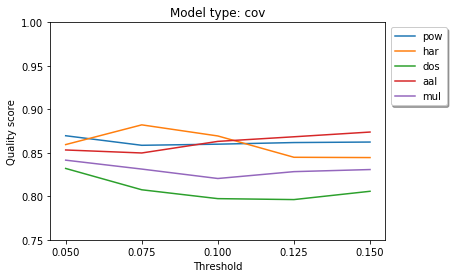

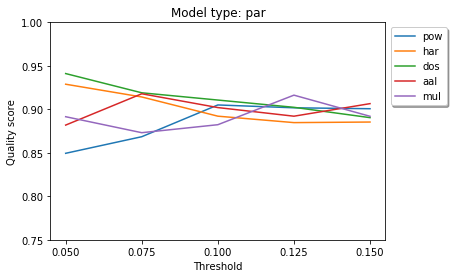

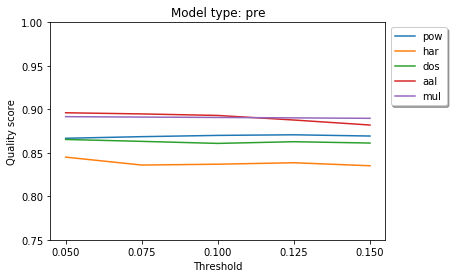

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
for mod in meta_mod:
    #--- 
    plt.plot(np.linspace(0.05,0.15,5),q[mod].T)
    plt.xticks(np.linspace(0.05,0.15,5))
    plt.ylim((0.75,1))
    #--- cosmetic changes
    plt.title('Model type: {}'.format(mod))
    plt.xlabel('Threshold')
    plt.ylabel('Quality score')
    plt.legend(meta_atl, loc='upper center', bbox_to_anchor=(1.1, 1),
              fancybox=True, shadow=True)
    plt.show()